In [4]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 1: Load the dataset
df = pd.read_csv("climate_change_crop_yield.csv")
df.head()

,Year,Temperature Increase (°C),Rainfall Change (mm),CO2 Levels (ppm),Crop Yield Reduction (%),Crop Type
0,2000,0.5,-10,370,2.0,Wheat
1,2005,0.7,-15,380,3.5,Rice
2,2010,1.0,-20,390,5.0,Corn
3,2015,1.3,-25,405,6.5,Soybean
4,2020,1.6,-30,420,8.0,Barley


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5 non-null      int64  
 1   Temperature Increase (°C)  5 non-null      float64
 2   Rainfall Change (mm)       5 non-null      int64  
 3   CO2 Levels (ppm)           5 non-null      int64  
 4   Crop Yield Reduction (%)   5 non-null      float64
 5   Crop Type                  5 non-null      object 
dtypes: float64(2), int64(3), object(1)
memory usage: 372.0+ bytes


In [9]:
#descriptive statistic of our data
df.describe()

,Year,Temperature Increase (°C),Rainfall Change (mm),CO2 Levels (ppm),Crop Yield Reduction (%)
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2010.000000,1.020000,-20.000000,393.000000,5.000000
std,7.905694,0.443847,7.905694,19.874607,2.371708
min,2000.000000,0.500000,-30.000000,370.000000,2.000000
25%,2005.000000,0.700000,-25.000000,380.000000,3.500000
50%,2010.000000,1.000000,-20.000000,390.000000,5.000000
75%,2015.000000,1.300000,-15.000000,405.000000,6.500000
max,2020.000000,1.600000,-10.000000,420.000000,8.000000


In [10]:
df.isnull().sum()

,0
Year,0
Temperature Increase (°C),0
Rainfall Change (mm),0
CO2 Levels (ppm),0
Crop Yield Reduction (%),0
Crop Type,0


[]

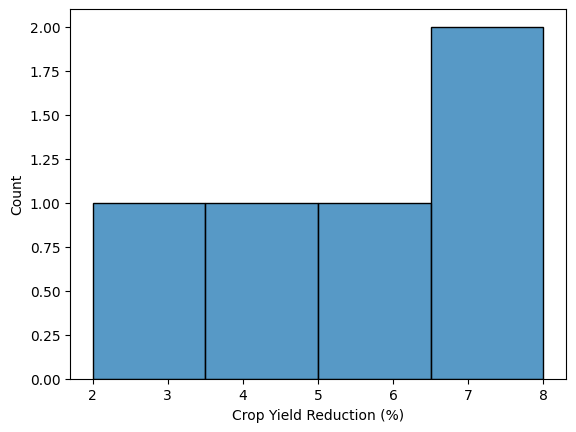

In [11]:
sns.histplot(df["Crop Yield Reduction (%)"])
plt.plot()

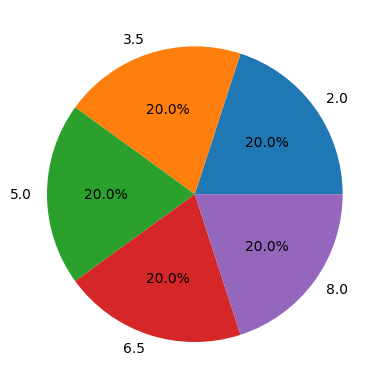

In [15]:
plt.pie(df['Crop Yield Reduction (%)'].value_counts().values,
        labels = df['Crop Yield Reduction (%)'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [12]:
# Step 2: Preprocess Data
# Encode categorical column 'State'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Crop Type'] = label_encoder.fit_transform(df['Crop Type'])
#fit_transform is responsible for doing three steps
#1)find unique values
#2)arrange in alphabetical order
#3)gives no. from 0
#

In [13]:
df.head()

,Year,Temperature Increase (°C),Rainfall Change (mm),CO2 Levels (ppm),Crop Yield Reduction (%),Crop Type
0,2000,0.5,-10,370,2.0,4
1,2005,0.7,-15,380,3.5,2
2,2010,1.0,-20,390,5.0,1
3,2015,1.3,-25,405,6.5,3
4,2020,1.6,-30,420,8.0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Example: RandomForest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

